In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

Download the dataset here:

https://data.opendatasoft.com/explore/dataset/cary-trees@townofcary/

In [2]:
df = pd.read_csv('./data/cary-trees.csv', delimiter=';',
                 usecols=['Name', 'Description', 'geo_point_2d']
                )
df['Latitude'] = df['geo_point_2d'].apply(lambda x: x.split(',')[0]).astype(float)
df['Longitude'] = df['geo_point_2d'].apply(lambda x: x.split(',')[1]).astype(float)
df = df.drop(columns='geo_point_2d')
df

,Name,Description,Latitude,Longitude
0,Crape myrtle,20 foot tall crape myrtle,35.789562,-78.779745
1,Big'un,Massive.,35.789822,-78.780237
2,Bald Cypress on Town Campus,Picture taken around the time (2000–01) the To...,35.789906,-78.780721
3,Dead Tree,"Test tree for Email, please hide.",35.703167,-78.813705
4,Admin Tree,My fav,35.832160,-78.843070
5,Garden Supply Dawn Redwood,A Dawn Redwood in fall color on the grounds of...,35.767054,-78.808558
6,Willow Oak at Totopos Restaurant,At one time (approximately 1992 to 2011) the C...,35.759094,-78.784060
7,Four-year-old Fig Tree,A fig tree that has grown to 20 feet in four y...,35.765856,-78.818059
8,Paper Bark Maple in Honor of Kay Struffolino,Planted for Arbor Day 2014,35.788675,-78.779611
9,Midway,Test for emailer,35.790603,-78.779089


**Questions**

- Where are the trees?

**Technical aspect**

- annotation

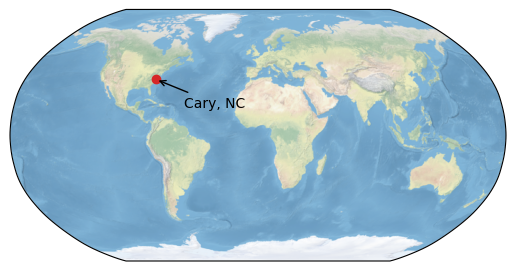

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()

clat = df['Latitude'].values.mean()
clon = df['Longitude'].values.mean()

ax.scatter(clon, clat, 
           transform=ccrs.PlateCarree(),
           color='C3',
          )

ax.annotate('Cary, NC', (clon, clat), 
            xytext=(20, -20),
            textcoords='offset points',
            transform=ccrs.PlateCarree(),
            arrowprops=dict(arrowstyle='->', color='black')
           )

plt.savefig('./plots/2023-10-27_cary_location.png', dpi=150, bbox_inches='tight')
plt.show()

In [4]:
sns.set_style('whitegrid')

In [5]:
df[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,29.000000,29.000000
mean,35.781403,-78.796675
std,0.020923,0.031762
min,35.703167,-78.925686
25%,35.772248,-78.808558
50%,35.788855,-78.780721
75%,35.789906,-78.779838
max,35.832160,-78.766940


In [6]:
df['Description']

df['is_real_tree'] = [1, 1, 1, 0, 0, 
                      1, 1, 1, 1, 0,
                      1, 1, 0, 0, 1,
                      1, 1, 1, 0, 1,
                      1, 1, 1, 1, 1,
                      1, 1, 1, 0]

In [7]:
real_df = df[df['is_real_tree'].astype(bool)]
real_df[['Longitude', 'Latitude']].describe(percentiles=[0, 1])

,Longitude,Latitude
count,22.000000,22.000000
mean,-78.791058,35.780755
std,0.018619,0.012330
min,-78.842322,35.755343
0%,-78.842322,35.755343
50%,-78.780794,35.788765
100%,-78.766940,35.797555
max,-78.766940,35.797555


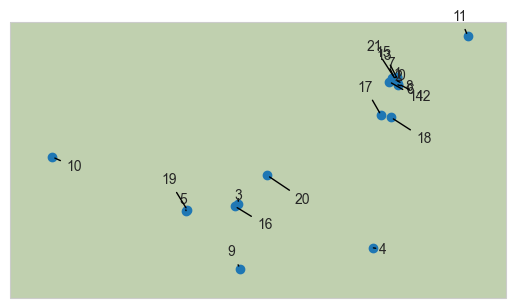

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()

ax.set_extent([-78.85, -78.76, 35.75, 35.80, ])

ax.scatter(real_df['Longitude'].values,
           real_df['Latitude'].values,
           transform=ccrs.PlateCarree())


for i in range(len(real_df)):

    ax.annotate(i,
                (real_df['Longitude'].values[i], real_df['Latitude'].values[i]),
                xytext=((-1)**i * i, (-1)**(i+1) * i),
                textcoords='offset points',
                transform=ccrs.PlateCarree(),
                arrowprops=dict(arrowstyle='-', color='black')
                
               )

plt.savefig('./plots/2023-10-27_trees_cary_location.png', dpi=150, bbox_inches='tight')
    
plt.show()

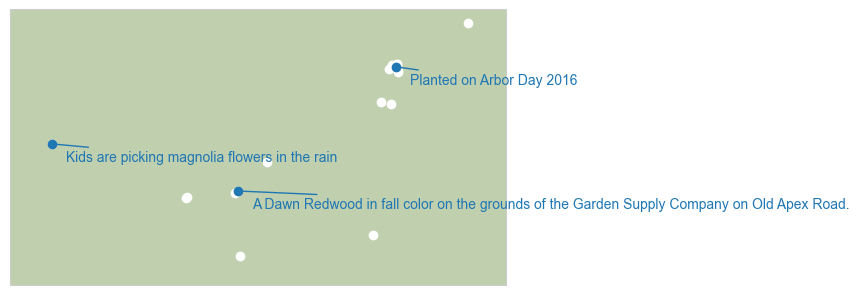

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()

ax.set_extent([-78.85, -78.76, 35.75, 35.80, ])

ax.scatter(real_df['Longitude'].values,
           real_df['Latitude'].values,
           facecolor='w',
           transform=ccrs.PlateCarree())


for i in [3, 10, 21]:
    ax.scatter(real_df['Longitude'].values[i],
               real_df['Latitude'].values[i],
               color='C0',
               transform=ccrs.PlateCarree())

    ax.annotate(real_df['Description'].values[i],
                (real_df['Longitude'].values[i], real_df['Latitude'].values[i]),
                xytext=(10, -10),
                textcoords='offset points',
                transform=ccrs.PlateCarree(),
                arrowprops=dict(arrowstyle='-', color='C0'),
                verticalalignment='center',
                color='C0',
               )

plt.savefig('./plots/2023-10-27_trees_cary_description.png', dpi=150, bbox_inches='tight')
    
plt.show()

In [10]:
df.tail(1)

,Name,Description,Latitude,Longitude,is_real_tree
28,tree peopkle,people,35.791904,-78.925686,0
